<h1 align="center">Теоретическая часть</h1> 

**Вопрос 1**: Пусть дан временной ряд $y_{t} = \delta \cdot t + \varepsilon_{t}$,
где $\varepsilon_{t}$ - случайная величина с нулевым матожиданием и не зависящей от времени дисперсией $\sigma$,
$E \varepsilon_{t} \varepsilon_{t+k} = 0$ при $k \not = 0$. Докажите, что оптимальное значение параметра сглаживания $\alpha$ в алгоритме простого экспоненциального сглаживания для такого временного ряда будет равно 1.

**Ответ:** Перейдем от $y_{t}$ к

$$z_{t} = y_{t} - y_{t-1} = \delta + \left(\varepsilon_{t} - \varepsilon_{t-1} \right) = \delta + \xi_{t}$$

Легко заметить, что

$$E \left[\xi_{t} \right] = 0$$

Далее можно получить следующее

$$D \left[\xi_{t} \right] = E \left[\xi_{t}^{2} \right] =
E \left[\left(\varepsilon_{t} - \varepsilon_{t-1} \right)^{2} \right] \color{red}{=}
E \left[\varepsilon_{t}^{2} \right] + E \left[\varepsilon_{t-1}^{2} \right] =
D \left[\varepsilon_{t} \right] + D \left[\varepsilon_{t-1} \right] = 2 \sigma$$

*Красное равенство получено из линейности математического ожидания и условия
$E \varepsilon_{t} \varepsilon_{t+k} = 0$ при $k \not = 0$.*

Так как теперь мы имеем дело с временным рядом, в котором отсутствует тренд или сезонность,
то, как было отмечено на лекции, алгоритм простого экспоненциального сглаживания предоставит
"ровный" прогноз: $y_{t+d|t} = y_{t+1|t}$. Этот прогноз зависит от начального уровня.

Из курса случайных процессов знаем, что оптимальным в данном случае будет прогноз вида

$$\widehat{y}_{t} = \delta$$

Этому прогнозу соответствует значение $\alpha$ равное 1.

---

**Вопрос 2**: Докажите эквивалетность формул расчёта (в рекуррентной форме и в форме корректировки прогноза (correction error form)) скрытых компонент временного ряда для модели линейного затухающего тренда:

$$l_{t} = \alpha y_{t} + \left(1 - \alpha \right) \left(l_{t-1} + \phi b_{t-1} \right) \color{red}{=} l_{t-1} + \phi b_{t-1} + \alpha e_{t}$$
$$b_{t} = \beta \left(l_{t} - l_{t-1} \right) + \left(1 - \beta \right) \phi b_{t-1} \color{red}{=} \phi b_{t-1} + \alpha \beta e_{t}$$

**Ответ:** Учитывая, что

$$\widehat{y}_{t+1|t} = l_{t} + \phi b_{t}$$
$$e_{t} = y_{t} - \widehat{y}_{t|t-1}$$

получим

$$l_{t} = \alpha y_{t} + \left(1 - \alpha \right) \left(l_{t-1} + \phi b_{t-1} \right) =$$
$$l_{t-1} + \phi b_{t-1} + \alpha\left(y_{t} - l_{t-1} - \phi b_{t-1} \right) =$$
$$l_{t-1} + \phi b_{t-1} + \alpha\left(y_{t} - y_{t|t-1}\right) =$$
$$l_{t-1} + \phi b_{t-1} + \alpha e_{t}$$

Воспользовавшись только что выведенным равенством получаем

$$b_{t} = \beta \left(l_{t} - l_{t-1} \right) + \left(1 - \beta \right) \phi b_{t-1} =$$
$$\beta \left(\phi b_{t-1} + \alpha e_{t} \right) + \phi b_{t-1} - \beta \phi b_{t-1} =$$
$$\phi b_{t-1} + \alpha \beta e_{t}$$

---

**Вопрос 3**: Выведите формулу расчёта скрытых компонент в форме корректировки прогноза (correction error form) временного ряда в модели ЭС с мультипликативным затухающим трендом (WS with multiplicative damped trend):

$$\widehat{y}_{t+d|t} = l_{t} b_{t}^{\left(\phi + \phi^{2} + \dots + \phi^{d} \right)}$$

$$l_{t} = \alpha y_{t} + \left(1 - \alpha \right) l_{t-1} b_{t-1}^{\phi}$$

$$b_{t} = \beta \frac{l_{t}}{l_{t-1}} + \left(1 - \beta \right) b_{t-1}^{\phi}$$

**Ответ:** Учитывая, что

$$\widehat{y}_{t+1|t} = l_{t} b_{t}^{\phi}$$
$$e_{t} = y_{t} - \widehat{y}_{t|t-1}$$

получим

$$l_{t} = \alpha y_{t} + \left(1 - \alpha \right) l_{t-1} b_{t-1}^{\phi} =$$
$$\alpha \left(y_{t} - l_{t-1} b_{t-1}^{\phi} \right) + l_{t-1} b_{t-1}^{\phi} =$$
$$\alpha \left(y_{t} - \widehat{y}_{t|t-1} \right) + l_{t-1} b_{t-1}^{\phi} =$$
$$\alpha e_{t} + l_{t-1} b_{t-1}^{\phi}$$

Воспользовавшись только что выведенным равенством получаем

$$b_{t} = \beta \frac{l_{t}}{l_{t-1}} + \left(1 - \beta \right) b_{t-1}^{\phi} =$$
$$\beta \left(\frac{l_{t}}{l_{t-1}} - b_{t-1}^{\phi} \right) + b_{t-1}^{\phi} =$$
$$\beta \left(\frac{l_{t} - l_{t-1} b_{t-1}^{\phi}}{l_{t-1}} \right) + b_{t-1}^{\phi} =$$
$$\alpha \beta \frac{e_{t}}{l_{t-1}} + b_{t-1}^{\phi}$$

<h1 align="center">Реализация алгоритма из семейства ES</h1>

**Суть задания**: Реализовать и применить на данных *monthly_wage* модель Уинтерса с линейным трендом.

$$\widehat y_{t+d} = (l_{t} + b_{t} d) \cdot s_{t+(d \bmod p)-p}$$

Результат нужно сравнить с прогнозом модели Тейла-Вейджа.

---

In [1]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class QualityFunction:
    def __init__(self, error='SSE'):
        self.error = error

    def eval(self, x, y):
        if self.error == 'SSE':
            return ((x - y) ** 2).sum()
        elif self.error == 'MSE':
            return ((x - y) ** 2).mean()
        elif self.error == 'RMSE':
            return (((x - y) ** 2).mean()) ** 0.5
        elif self.error == 'MAE':
            return (x - y).abs().mean()
        elif self.error == 'MAPE':
            qlt = ((x - y).abs() / x).replace([np.inf, -np.inf], np.nan)
            return qlt.mean()
        elif self.error == 'MACAPE':
            qlt = (2 * (x - y).abs() / (x + y)).replace([np.inf, -np.inf], np.nan)
            return qlt.mean()
        elif self.error == 'MedianAE':
            return ((x - y).abs()).median()
        else:
            raise KeyError('Wrong error function')

In [3]:
class TheilWage:
    def __init__(self, x, h, params):
        self.t = len(x)
        self.h = h
        self.x = x
        self.alpha = params['alpha']
        self.beta = params['beta']
        self.gamma = params['gamma']
        self.p = params['seasonality_period']
        self.forecast = [np.NaN] * (self.t + self.h)

    def __str__(self):
        return 'TheilWage'

    def predict(self):
        l = np.NaN
        b = np.NaN
        s = []

        for i in range(self.p):
            if not math.isnan(self.x[i]):
                s.append(self.x[i])
            else:
                s.append(s[i - 1])

        for cntr in range(self.t):
            if not math.isnan(self.x[cntr]):
                if math.isnan(l):
                    l = self.x[cntr]
                if math.isnan(b):
                    b = 0
                if cntr < self.p:
                    l_old = l
                    l = self.alpha * (self.x[cntr] - s[cntr]) + (1 - self.alpha) * (l + b)
                    b = self.beta * (l - l_old) + (1 - self.beta) * b
                else:
                    l_old = l
                    l = self.alpha * (self.x[cntr] - s[cntr % self.p]) + (1 - self.alpha) * (l + b)
                    s[cntr % self.p] = self.gamma * (self.x[cntr] - l) + (1 - self.gamma) * s[cntr % self.p]
                    b = self.beta * (l - l_old) + (1 - self.beta) * b
            self.forecast[cntr + self.h] = l + b + s[(cntr + self.h) % self.p]

        return self.forecast

In [4]:
def build_forecast(h, ts, model, params_list, step='D'):
    forecast = {}

    for params in params_list:
        frc_horizon = pd.date_range(ts.index[-1], periods=h + 1, freq=step)[1:]
        frc_ts = pd.DataFrame(index=ts.index.append(frc_horizon), columns=ts.columns)

        for cntr in ts.columns:
            tw = model(ts[cntr], h, params)
            frc_ts[cntr] = tw.predict()

        forecast['{0} {1}'.format(str(model), params)] = frc_ts

    return forecast

In [5]:
def plot_forecast(ts, forecast, model_name):
    forecast.columns = ts.columns + '; ' + model_name
    ts[ts.columns[0]].plot(style='b', linewidth=1.0, marker='o')
    ax = forecast[forecast.columns[0]].plot(style='r-^', figsize=(15, 5), linewidth=1.0)
    plt.xlabel("Time ticks")
    plt.ylabel("TS values")
    plt.legend()
    plt.show()

---

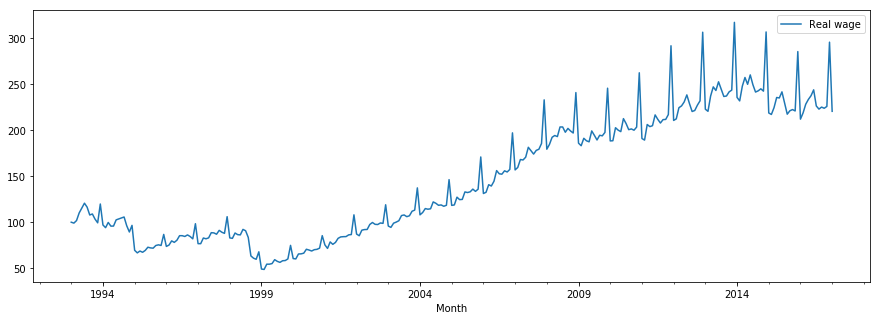

In [6]:
wage = pd.read_csv('monthly_wage.csv', sep=';', decimal='.', index_col=0, parse_dates=True, dayfirst=True)
wage.plot(figsize=(15,5))

# Build the Forecast with Theil-Wage Model

You need to apply Theil-Wage model for the TS *monthly_wage.csv*.

Forecast delay $h=1$ for all point in this task.


* Forecast Wage TS with Theil-Wage $\alpha = 0.1, \beta = 0.3, \gamma = 0.3$.
* Find the best param $\alpha, \beta, \gamma$ of Theil-Wage for data period from 09.1998 to 01.2015. 
* Draw the forecast that correspond to Theil-Wage with optimial values of $\alpha, \beta, \gamma$ (use time steps from 09.1998 to 01.2017).
  Conclude whether Theil-Wage model can be used for this TS? If can not than explain why.
* Calculate loss of the forecast of TS in [02.2015, 01.2017].

### Forecast TS with Theil-Wage

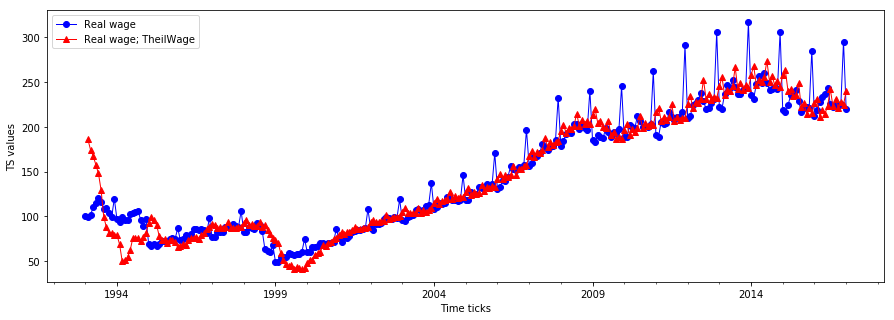

In [7]:
params_list = [{'alpha': 0.1, 'beta': 0.3, 'gamma': 0.3, 'seasonality_period': 7}]
forecast = build_forecast(h=1, ts=wage, model=TheilWage, params_list=params_list, step='MS')
plot_forecast(wage.loc['1993-01-01':'2017-01-01'],
              forecast[list(forecast)[0]].loc['1993-01-01':'2017-01-01'],
              model_name='TheilWage')

### Search for the optimal $\alpha$, $\beta$, $\gamma$

In [8]:
ALPHA = np.linspace(0, 1, 21)
BETA = np.linspace(0, 1, 21)
GAMMA = np.linspace(0, 1, 21)
params_list = [{'alpha': alpha, 'beta': beta, 'gamma': gamma, 'seasonality_period': 7}
               for gamma in GAMMA for beta in BETA for alpha in ALPHA]
forecast = build_forecast(h=1, ts=wage, model=TheilWage, params_list=params_list, step='MS')

In [9]:
qf = QualityFunction('MAE')
quality = pd.DataFrame(index=wage.columns, columns=forecast.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(quality.columns):
    frc_wage = forecast[param_cntr]
    quality[param_cntr] = qf.eval(wage.loc[ix], frc_wage.loc[ix])

quality[quality.columns].mean().sort_values()

<class '__main__.TheilWage'> {'alpha': 0.25, 'beta': 0.05, 'gamma': 0.15000000000000002, 'seasonality_period': 7}                                      9.763592
<class '__main__.TheilWage'> {'alpha': 0.25, 'beta': 0.1, 'gamma': 0.15000000000000002, 'seasonality_period': 7}                                       9.771932
<class '__main__.TheilWage'> {'alpha': 0.30000000000000004, 'beta': 0.05, 'gamma': 0.15000000000000002, 'seasonality_period': 7}                       9.776902
<class '__main__.TheilWage'> {'alpha': 0.25, 'beta': 0.15000000000000002, 'gamma': 0.15000000000000002, 'seasonality_period': 7}                       9.811639
<class '__main__.TheilWage'> {'alpha': 0.30000000000000004, 'beta': 0.1, 'gamma': 0.15000000000000002, 'seasonality_period': 7}                        9.813769
<class '__main__.TheilWage'> {'alpha': 0.2, 'beta': 0.15000000000000002, 'gamma': 0.15000000000000002, 'seasonality_period': 7}                        9.816255
<class '__main__.TheilWage'> {'alpha': 0

### Draw the forecast with the optimial $\alpha, \beta, \gamma$

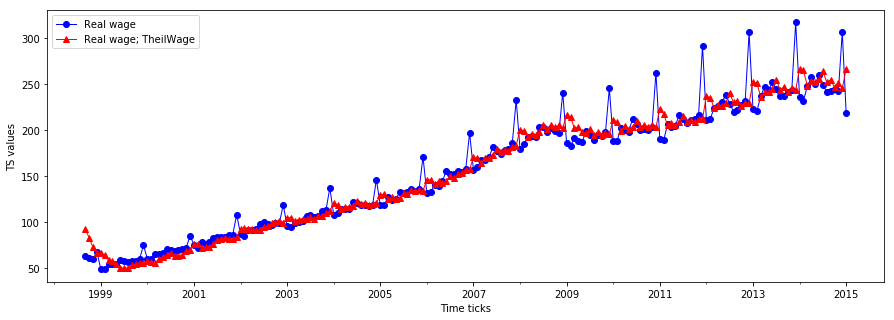

In [10]:
best_alg = quality[quality.columns].mean().sort_values().index[0]
plot_forecast(wage.loc['1998-09-01':'2015-01-01'],
              forecast[best_alg].loc['1998-09-01':'2015-01-01'],
              model_name='TheilWage')

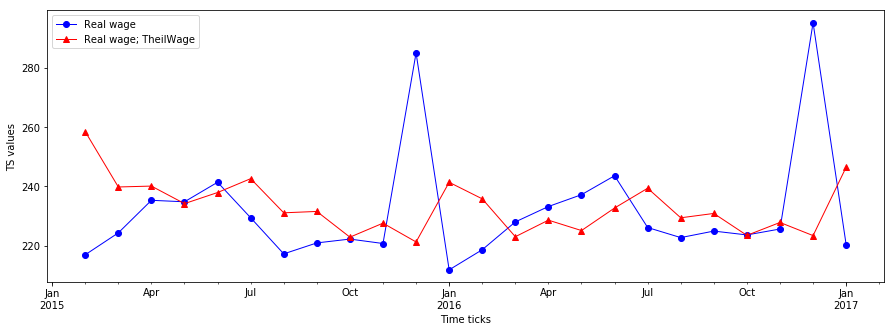

In [11]:
best_alg = quality[quality.columns].mean().sort_values().index[0]
plot_forecast(wage.loc['2015-02-01':'2017-01-01'],
              forecast[best_alg].loc['2015-02-01':'2017-01-01'],
              model_name='TheilWage')

In [12]:
# Remember the Theil-Wage model's forecast for the future
tw = forecast[best_alg]

### Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [13]:
qf.eval(wage.loc['2015-02-01':'2017-01-01'],
        forecast[best_alg].loc['2015-02-01':'2017-01-01'])

Real wage    15.872398
dtype: float64

# Non-additive model of ES

You need to implement Winters model with linear trend and then use it for the TS *monthly_wage.csv*.

Forecast delay $h=1$ for all point in this task.

### Implement Winters Model with Linear trend

In [14]:
class Winter():
    def __init__(self, x, h, params):
        self.t = len(x)
        self.h = h
        self.x = x
        self.alpha = params['alpha']
        self.beta = params['beta']
        self.gamma = params['gamma']
        self.p = params['seasonality_period']
        self.forecast = [np.NaN] * (self.t + self.h)

    def __str__(self):
        return 'Winter'
 
    def predict(self):
        l = np.NaN
        b = np.NaN
        s = []

        for i in range(self.p):
            if not math.isnan(self.x[i]):
                s.append(self.x[i])
            else:
                s.append(s[i - 1])

        for cntr in range(self.t):
            if not math.isnan(self.x[cntr]):
                if math.isnan(l):
                    l = self.x[cntr]
                if math.isnan(b):
                    b = 0
                if cntr < self.p:
                    l_old = l
                    l = self.alpha * (self.x[cntr] / s[cntr]) + (1 - self.alpha) * (l + b)
                    b = self.beta * (l - l_old) + (1 - self.beta) * b
                else:
                    l_old = l
                    l = self.alpha * (self.x[cntr] / s[cntr % self.p]) + (1 - self.alpha) * (l + b)
                    s[cntr % self.p] = self.gamma * (self.x[cntr] / l) + (1 - self.gamma) * s[cntr % self.p]
                    b = self.beta * (l - l_old) + (1 - self.beta) * b
            self.forecast[cntr + self.h] = (l + b) * s[(cntr + self.h) % self.p]

        return self.forecast

### Search for the optimal $\alpha$, $\beta$, $\gamma$

In [15]:
ALPHA = np.linspace(0, 1, 21)
BETA = np.linspace(0, 1, 21)
GAMMA = np.linspace(0, 1, 21)
params_list = [{'alpha': alpha, 'beta': beta, 'gamma': gamma, 'seasonality_period': 7}
               for gamma in GAMMA for beta in BETA for alpha in ALPHA]
forecast = build_forecast(h=1, ts=wage, model=Winter, params_list=params_list, step='MS')

In [16]:
qf = QualityFunction('MAE')
quality = pd.DataFrame(index=wage.columns, columns=forecast.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(quality.columns):
    frc_wage = forecast[param_cntr]
    quality[param_cntr] = qf.eval(wage.loc[ix], frc_wage.loc[ix])

quality[quality.columns].mean().sort_values()

<class '__main__.Winter'> {'alpha': 0.30000000000000004, 'beta': 0.0, 'gamma': 0.15000000000000002, 'seasonality_period': 7}                   9.879541e+00
<class '__main__.Winter'> {'alpha': 0.25, 'beta': 0.0, 'gamma': 0.15000000000000002, 'seasonality_period': 7}                                  9.918043e+00
<class '__main__.Winter'> {'alpha': 0.35000000000000003, 'beta': 0.0, 'gamma': 0.15000000000000002, 'seasonality_period': 7}                   9.975313e+00
<class '__main__.Winter'> {'alpha': 0.25, 'beta': 0.0, 'gamma': 0.1, 'seasonality_period': 7}                                                  9.994555e+00
<class '__main__.Winter'> {'alpha': 0.30000000000000004, 'beta': 0.0, 'gamma': 0.2, 'seasonality_period': 7}                                   1.004019e+01
<class '__main__.Winter'> {'alpha': 0.35000000000000003, 'beta': 0.0, 'gamma': 0.2, 'seasonality_period': 7}                                   1.005717e+01
<class '__main__.Winter'> {'alpha': 0.30000000000000004, 'beta':

### Draw the forecast with the optimal $\alpha, \beta, \gamma$

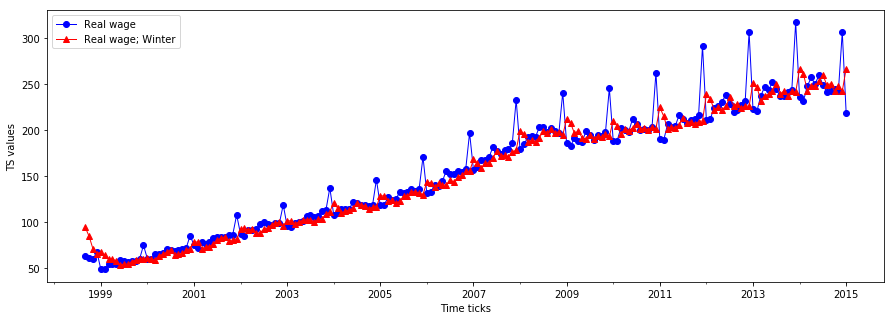

In [17]:
best_alg = quality[quality.columns].mean().sort_values().index[0]
plot_forecast(wage.loc['1998-09-01':'2015-01-01'],
              forecast[best_alg].loc['1998-09-01':'2015-01-01'],
              model_name='Winter')

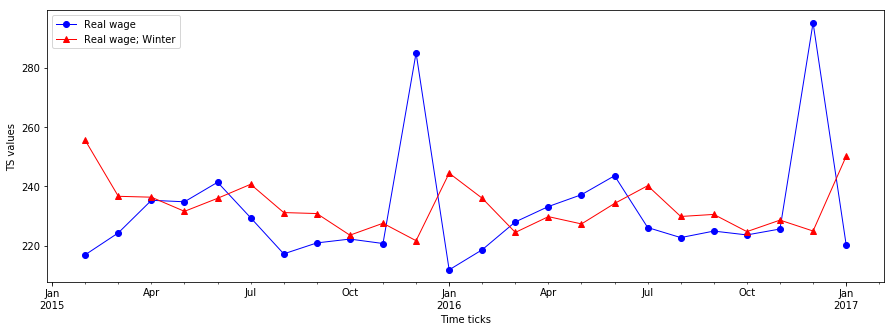

In [18]:
best_alg = quality[quality.columns].mean().sort_values().index[0]
plot_forecast(wage.loc['2015-02-01':'2017-01-01'],
              forecast[best_alg].loc['2015-02-01':'2017-01-01'],
              model_name='Winter')

### Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [19]:
qf.eval(wage.loc['2015-02-01':'2017-01-01'],
        forecast[best_alg].loc['2015-02-01':'2017-01-01'])

Real wage    15.627587
dtype: float64

### Compare Winters Model with linear thend and Theil-Wage model

Which forecast is better (more accurate)?
Is it true that Winters model is more appropriate then Theil-Wage Model to this time series?
Hint: you should use for example Diebold-Mariano test (see here https://github.com/johntwk/Diebold-Mariano-Test) to make a conclusion.

In [20]:
def dm_test(actual_lst, pred1_lst, pred2_lst, h=1, crit="MSE", power=2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt, msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt, msg)
        len_act = len(actual_lst)
        len_p1 = len(pred1_lst)
        len_p2 = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt, msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt, msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt, msg)
            # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")

        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True

        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt, msg)
        return (rt, msg)

    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np

    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst = []

    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()

    # Length of lists (as real numbers)
    T = float(len(actual_lst))

    # construct d according to crit
    if (crit == "MSE"):
        for actual, p1, p2 in zip(actual_lst, pred1_lst, pred2_lst):
            e1_lst.append((actual - p1) ** 2)
            e2_lst.append((actual - p2) ** 2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual, p1, p2 in zip(actual_lst, pred1_lst, pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual, p1, p2 in zip(actual_lst, pred1_lst, pred2_lst):
            e1_lst.append(abs((actual - p1) / actual))
            e2_lst.append(abs((actual - p2) / actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual, p1, p2 in zip(actual_lst, pred1_lst, pred2_lst):
            e1_lst.append(((actual - p1)) ** (power))
            e2_lst.append(((actual - p2)) ** (power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)

            # Mean of d        
    mean_d = pd.Series(d_lst).mean()

    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N - k):
            autoCov += ((Xi[i + k]) - Xs) * (Xi[i] - Xs)
        return (1 / (T)) * autoCov

    gamma = []
    for lag in range(0, h):
        gamma.append(autocovariance(d_lst, len(d_lst), lag, mean_d))  # 0, 1, 2
    V_d = (gamma[0] + 2 * sum(gamma[1:])) / T
    DM_stat = V_d ** (-0.5) * mean_d
    harvey_adj = ((T + 1 - 2 * h + h * (h - 1) / T) / T) ** (0.5)
    DM_stat = harvey_adj * DM_stat
    # Find p-value
    p_value = 2 * t.cdf(-abs(DM_stat), df=T - 1)

    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')

    rt = dm_return(DM=DM_stat, p_value=p_value)

    return rt

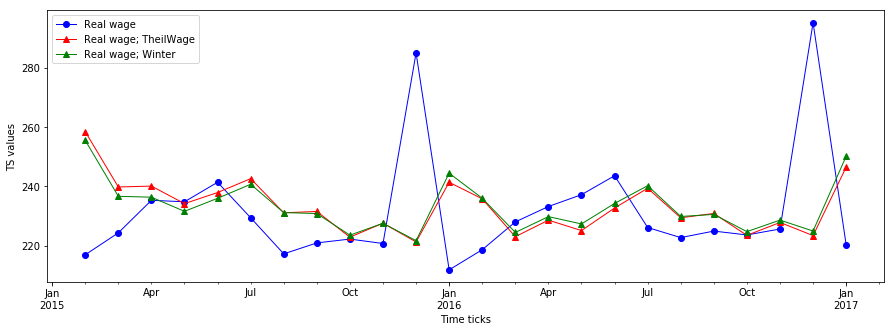

In [21]:
ts = wage.loc['2015-02-01':'2017-01-01']
theil_wage = tw.loc['2015-02-01':'2017-01-01']
winter = forecast[best_alg].loc['2015-02-01':'2017-01-01']

theil_wage.columns = ts.columns + '; ' + 'TheilWage'
winter.columns = ts.columns + '; ' + 'Winter'
ts[ts.columns[0]].plot(style='b', linewidth=1.0, marker='o')
ax = theil_wage[theil_wage.columns[0]].plot(style='r-^', figsize=(15, 5), linewidth=1.0)
ax = winter[winter.columns[0]].plot(style='g-^', figsize=(15, 5), linewidth=1.0)
plt.xlabel('Time ticks')
plt.ylabel('TS values')
plt.legend()
plt.show()

In [22]:
dm_test(list(wage.loc['2015-02-01':'2017-01-01']['Real wage']),
        list(tw.loc['2015-02-01':'2017-01-01']['Real wage']),
        list(forecast[best_alg].loc['2015-02-01':'2017-01-01']['Real wage']),
        h=1,
        crit='MAD')

dm_return(DM=0.6217934461779533, p_value=0.5401928362184172)

**Вывод:**
1. *Theil-Wage model* может быть применена для прогнозирования временного ряда *monthly_wage*: графики временного ряда, полученного с помощью данной модели хорошо описывают тренд, а также отмечают сезонные пики (недостаточно сильно, но все же явное колебание в нужный момент присутствует)
2. Аналогичные слова можно сказать и про *Winter's model*
3. *Diebold-Mariano test* показывает, что гипотеза о том, что предсказания, полученные этими двумя способами, почти не отличаются, не отвергается; это хорошо видно на последнем графике